In [1]:
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pickle
import networkx as nx
from scipy.spatial import distance
import community as community_louvain
from tqdm import tqdm
import time
import scipy.stats as stats

In [2]:
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/VISp_betweenness.pkl', 'rb') as f:
    VISp_betweenness = pickle.load(f)

with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/VISal_betweenness.pkl', 'rb') as f:
    VISal_betweenness = pickle.load(f)

with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/SSp_bfd_betweenness.pkl', 'rb') as f:
    SSp_bfd_betweenness = pickle.load(f)

print("I dati sono stati caricati con successo.")

I dati sono stati caricati con successo.


In [3]:
type(VISp_betweenness[0])

dict

In [4]:
VISp_betweenness[0]

{1.0: 0.0,
 2.0: 8.348278310601714e-05,
 3.0: 0.0001669500012296336,
 4.0: 0.00025040165437084937,
 5.0: 0.0003338377425296645,
 6.0: 0.00041725826570607893,
 7.0: 0.0004945461858166277,
 8.0: 0.0005526736125919462,
 9.0: 0.0006298214478608889,
 10.0: 0.0007084790864226969,
 11.0: 0.0007804282175698144,
 12.0: 0.0008583854319235921,
 13.0: 0.0009363270812949692,
 14.0: 0.0010142531656839454,
 15.0: 0.0010921636850905212,
 16.0: 0.0011700586395146963,
 17.0: 0.0012479380289564706,
 18.0: 0.0013258018534158442,
 19.0: 0.0014036501128928173,
 20.0: 0.0014814828073873897,
 21.0: 0.0013803026392918056,
 22.0: 0.001449154338941189,
 23.0: 0.001405673560604905,
 24.0: 0.0014693888160620657,
 25.0: 0.0015330885065368257,
 26.0: 0.0015967726320291848,
 27.0: 0.0016604411925391436,
 28.0: 0.0017240941880667016,
 29.0: 0.0017877316186118587,
 30.0: 0.0018513534841746154,
 31.0: 0.0019149597847549712,
 32.0: 0.0019785505203529265,
 33.0: 0.0020421256909684813,
 34.0: 0.002105685296601635,
 35.0: 0

In [5]:
def extract_betweenness(betweenness_list):
    all_betweenness = []
    for neuron_betweenness in betweenness_list:
        all_betweenness.extend(neuron_betweenness.values())
    return all_betweenness

# Estrarre le betweenness centrality per ogni area
VISp_all_betweenness = extract_betweenness(VISp_betweenness)
VISal_all_betweenness = extract_betweenness(VISal_betweenness)
SSp_bfd_all_betweenness = extract_betweenness(SSp_bfd_betweenness)

# Calcolare statistiche descrittive
def calculate_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    return mean, median, std

VISp_stats = calculate_statistics(VISp_all_betweenness)
VISal_stats = calculate_statistics(VISal_all_betweenness)
SSp_bfd_stats = calculate_statistics(SSp_bfd_all_betweenness)

print(f"Statistiche VISp:\nMedia: {VISp_stats[0]:.4f}, Mediana: {VISp_stats[1]:.4f}, Deviazione Standard: {VISp_stats[2]:.4f}")
print(f"Statistiche VISal:\nMedia: {VISal_stats[0]:.4f}, Mediana: {VISal_stats[1]:.4f}, Deviazione Standard: {VISal_stats[2]:.4f}")
print(f"Statistiche SSp_bfd:\nMedia: {SSp_bfd_stats[0]:.4f}, Mediana: {SSp_bfd_stats[1]:.4f}, Deviazione Standard: {SSp_bfd_stats[2]:.4f}")

Statistiche VISp:
Media: 0.0016, Mediana: 0.0001, Deviazione Standard: 0.0069
Statistiche VISal:
Media: 0.0012, Mediana: 0.0001, Deviazione Standard: 0.0047
Statistiche SSp_bfd:
Media: 0.0010, Mediana: 0.0000, Deviazione Standard: 0.0052


In [6]:
len(VISp_all_betweenness)

702758

In [7]:
len(VISal_all_betweenness)

294822

In [8]:
len(SSp_bfd_all_betweenness)

1182156

In [9]:
# Eseguire test statistici
t_stat_VISp_VISal, p_val_VISp_VISal = stats.ttest_ind(VISp_all_betweenness, VISal_all_betweenness)
ks_stat_VISp_VISal, ks_p_val_VISp_VISal = stats.ks_2samp(VISp_all_betweenness, VISal_all_betweenness)

t_stat_VISp_SSp_bfd, p_val_VISp_SSp_bfd = stats.ttest_ind(VISp_all_betweenness, SSp_bfd_all_betweenness)
ks_stat_VISp_SSp_bfd, ks_p_val_VISp_SSp_bfd = stats.ks_2samp(VISp_all_betweenness, SSp_bfd_all_betweenness)

t_stat_VISal_SSp_bfd, p_val_VISal_SSp_bfd = stats.ttest_ind(VISal_all_betweenness, SSp_bfd_all_betweenness)
ks_stat_VISal_SSp_bfd, ks_p_val_VISal_SSp_bfd = stats.ks_2samp(VISal_all_betweenness, SSp_bfd_all_betweenness)

print(f"\nTest statistici tra VISp e VISal:\nt-test: t-statistica = {t_stat_VISp_VISal:.4f}, p-valore = {p_val_VISp_VISal:.4f}\nKS test: ks-statistica = {ks_stat_VISp_VISal:.4f}, p-valore = {ks_p_val_VISp_VISal:.4f}")
print(f"\nTest statistici tra VISp e SSp_bfd:\nt-test: t-statistica = {t_stat_VISp_SSp_bfd:.4f}, p-valore = {p_val_VISp_SSp_bfd:.4f}\nKS test: ks-statistica = {ks_stat_VISp_SSp_bfd:.4f}, p-valore = {ks_p_val_VISp_SSp_bfd:.4f}")
print(f"\nTest statistici tra VISal e SSp_bfd:\nt-test: t-statistica = {t_stat_VISal_SSp_bfd:.4f}, p-valore = {p_val_VISal_SSp_bfd:.4f}\nKS test: ks-statistica = {ks_stat_VISal_SSp_bfd:.4f}, p-valore = {ks_p_val_VISal_SSp_bfd:.4f}")


Test statistici tra VISp e VISal:
t-test: t-statistica = 25.7390, p-valore = 0.0000
KS test: ks-statistica = 0.0433, p-valore = 0.0000

Test statistici tra VISp e SSp_bfd:
t-test: t-statistica = 69.2767, p-valore = 0.0000
KS test: ks-statistica = 0.0910, p-valore = 0.0000

Test statistici tra VISal e SSp_bfd:
t-test: t-statistica = 24.4266, p-valore = 0.0000
KS test: ks-statistica = 0.0559, p-valore = 0.0000


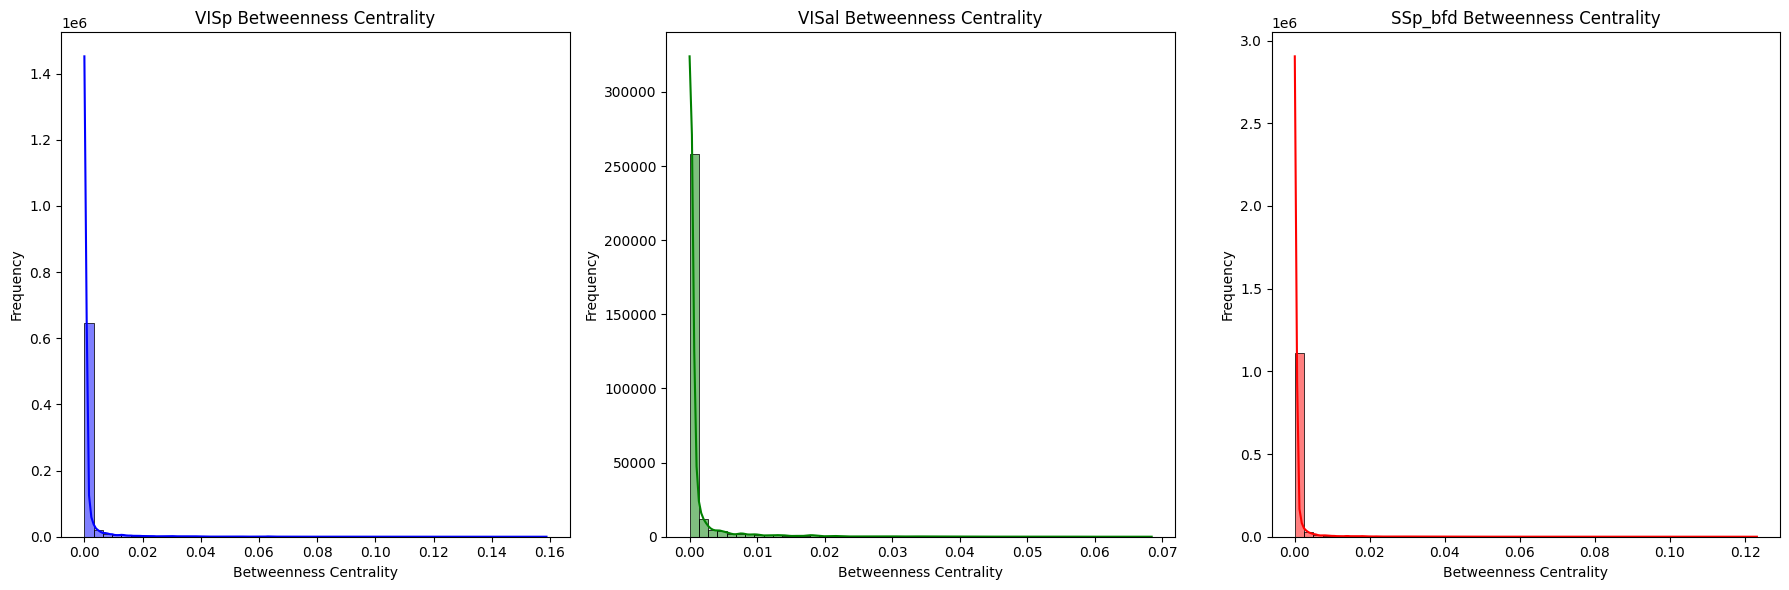

In [10]:
import seaborn as sns

# Funzione per visualizzare le distribuzioni con istogramma e KDE plot
def plot_betweenness_distributions(VISp, VISal, SSp_bfd):
    plt.figure(figsize=(18, 6))

    # Istogramma e KDE per VISp
    plt.subplot(1, 3, 1)
    sns.histplot(VISp, bins=50, kde=True, color='blue')
    plt.title('VISp Betweenness Centrality')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Frequency')

    # Istogramma e KDE per VISal
    plt.subplot(1, 3, 2)
    sns.histplot(VISal, bins=50, kde=True, color='green')
    plt.title('VISal Betweenness Centrality')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Frequency')

    # Istogramma e KDE per SSp_bfd
    plt.subplot(1, 3, 3)
    sns.histplot(SSp_bfd, bins=50, kde=True, color='red')
    plt.title('SSp_bfd Betweenness Centrality')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Chiamare la funzione per visualizzare le distribuzioni
plot_betweenness_distributions(VISp_all_betweenness, VISal_all_betweenness, SSp_bfd_all_betweenness)


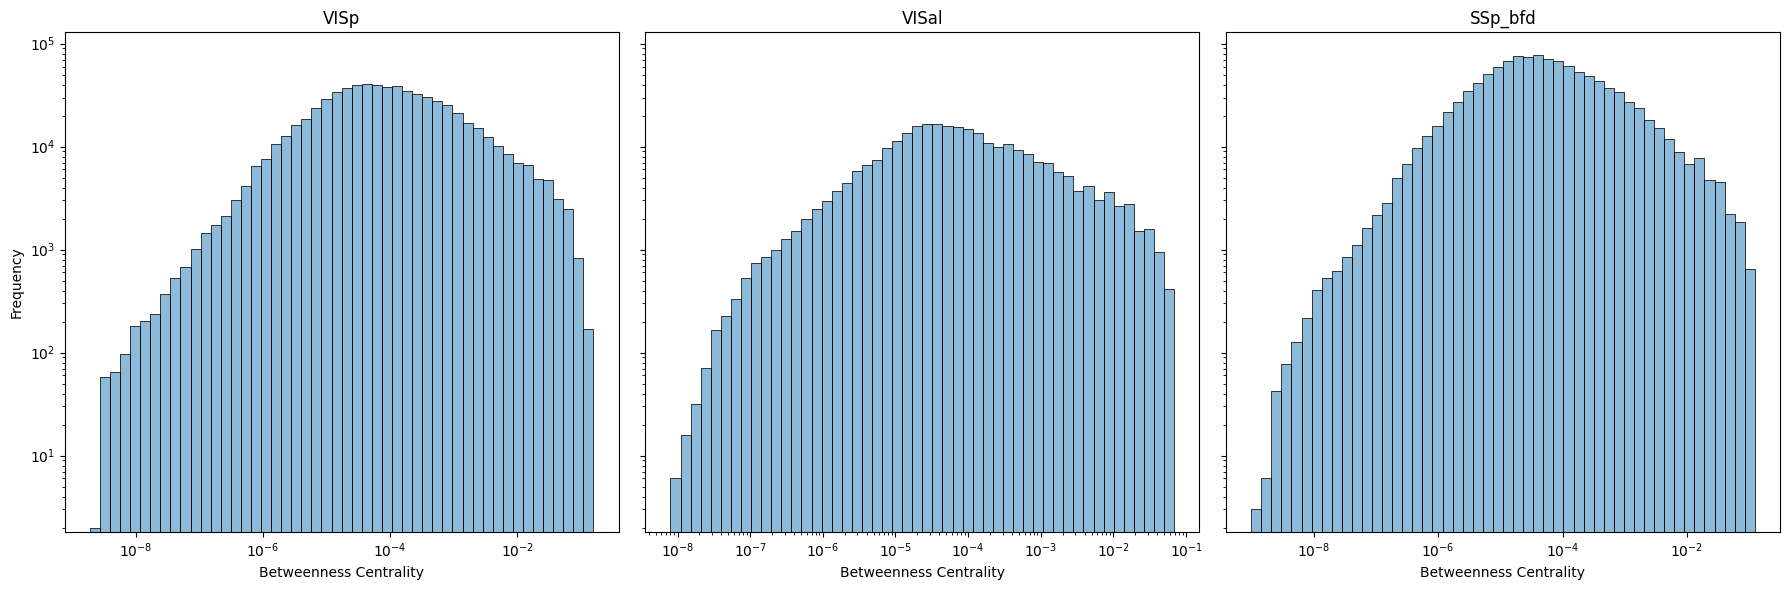

In [13]:
def create_heatmap_subplot(data, title, ax):
    sns.histplot(data, bins=50, kde=True, pthresh=0.1, log_scale=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Betweenness Centrality')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')

# Creazione delle heatmap per ciascuna area in un'unica figura con tre subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

create_heatmap_subplot(VISp_all_betweenness, 'VISp', axs[0])
create_heatmap_subplot(VISal_all_betweenness, 'VISal', axs[1])
create_heatmap_subplot(SSp_bfd_all_betweenness, 'SSp_bfd', axs[2])

plt.tight_layout()
plt.show()

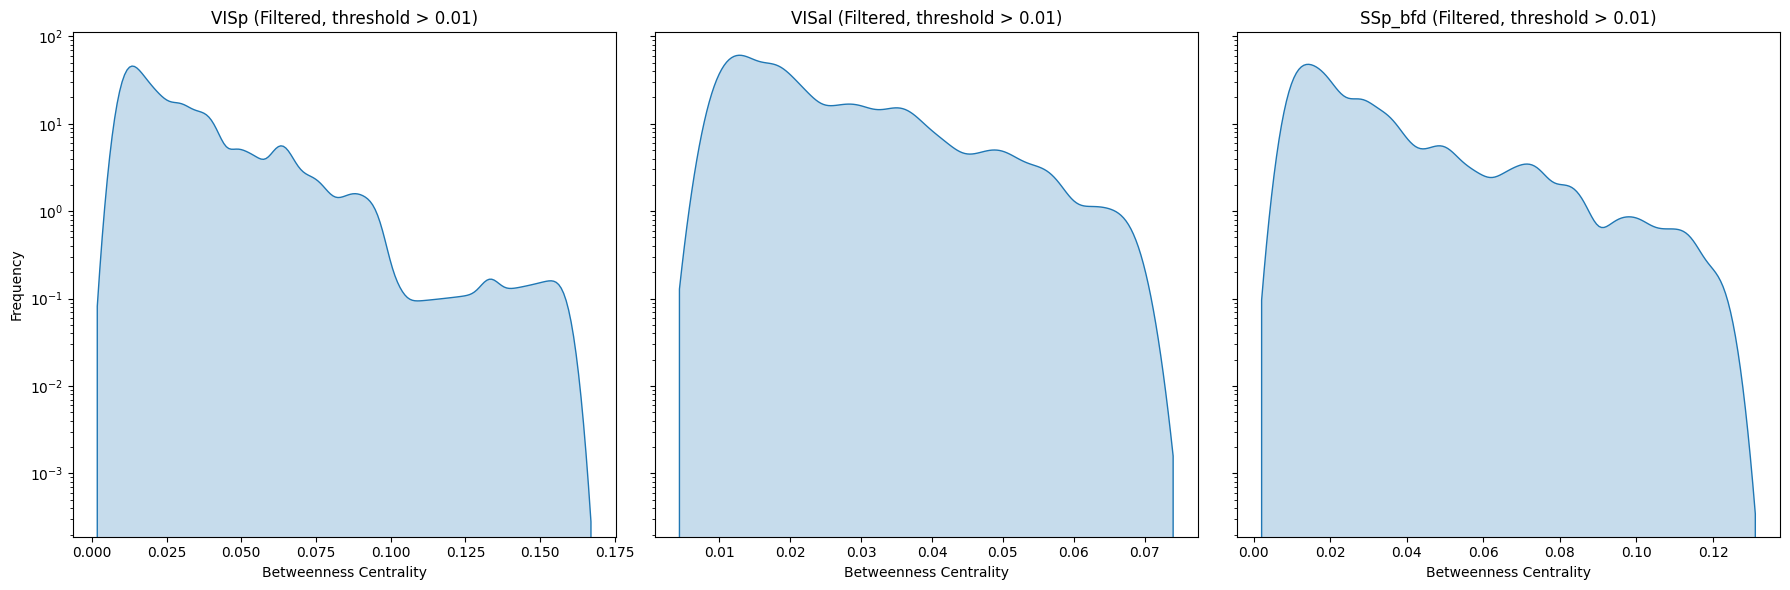

In [16]:
# Definisci una soglia per la betweenness centrality
threshold = 0.01

# Funzione per filtrare i valori di betweenness centrality sopra una certa soglia
def filter_betweenness(data, threshold):
    return [value for value in data if value > threshold]

# Funzione per creare una heatmap di densità 2D in un subplot
def create_heatmap_subplot(data, title, ax):
    sns.kdeplot(data, fill=True, cmap="viridis", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Betweenness Centrality')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')

# Filtrare i dati
VISp_filtered = filter_betweenness(VISp_all_betweenness, threshold)
VISal_filtered = filter_betweenness(VISal_all_betweenness, threshold)
SSp_bfd_filtered = filter_betweenness(SSp_bfd_all_betweenness, threshold)

# Creazione delle heatmap per ciascuna area in un'unica figura con tre subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

create_heatmap_subplot(VISp_filtered, f'VISp (Filtered, threshold > {threshold})', axs[0])
create_heatmap_subplot(VISal_filtered, f'VISal (Filtered, threshold > {threshold})', axs[1])
create_heatmap_subplot(SSp_bfd_filtered, f'SSp_bfd (Filtered, threshold > {threshold})', axs[2])

plt.tight_layout()
plt.show()